In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
from utils import load_results, summarize_folders
from mnist_utils import (
    plot_coverage_vs_n,
    plot_efficency_vs_coverage,
    plot_efficiency_vs_n,
    plot_relative_efficiency_vs_n,
    plot_efficiency_vs_prior_opts
)
from matplotlib import pyplot as plt

plt.rcParams.update({"text.usetex": True, "font.family": "mathpazo"})
import pandas as pd
import os
import glob

In [19]:
RESULTS_ROOT = "results/mnist/"
FIGURES_ROOT = "figures/mnist/"
os.makedirs(FIGURES_ROOT, exist_ok=True)

### Load all results into a single dataframe

In [20]:
results = summarize_folders(glob.glob(os.path.join(RESULTS_ROOT, "*/")))

### Generate plots

#### Main body summary figure

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


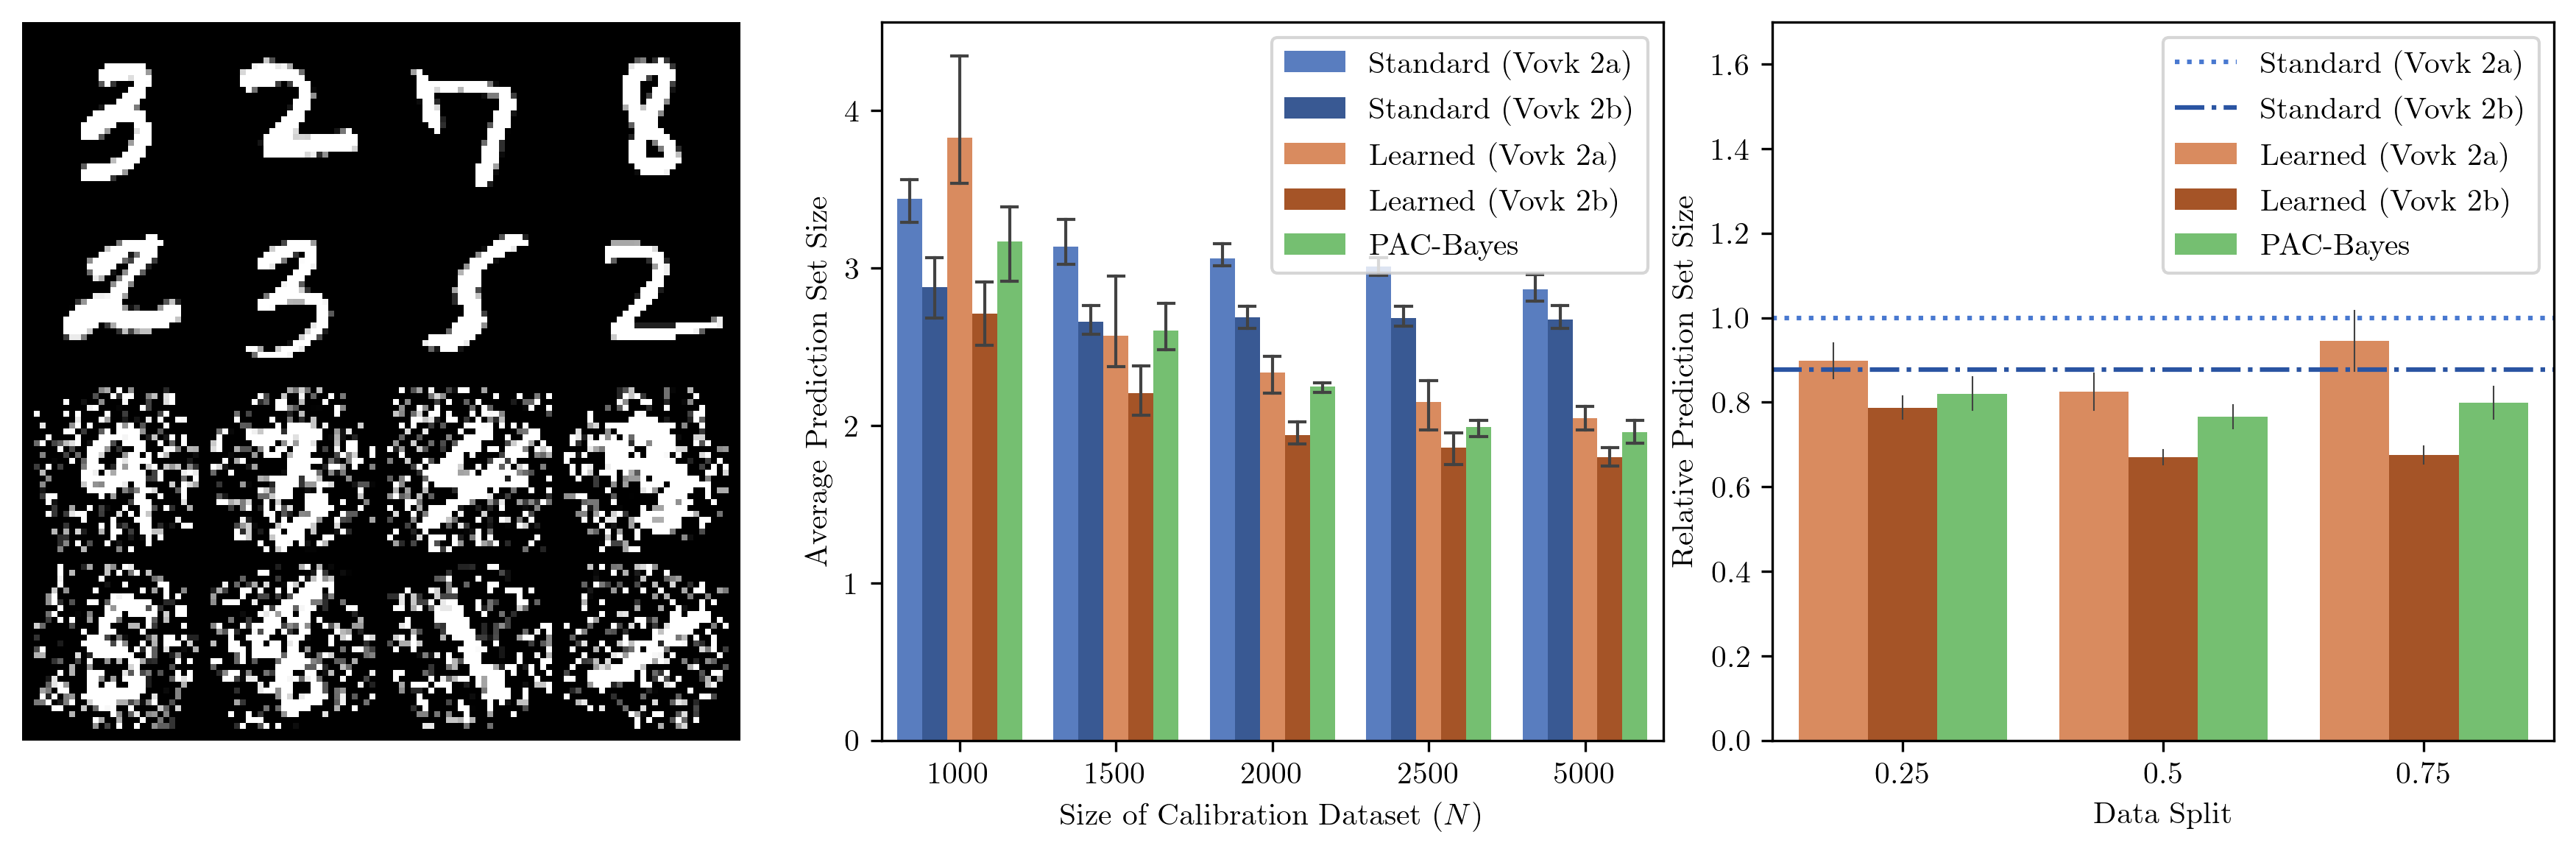

In [40]:
from torchvision.utils import make_grid
from confpred_eval.datasets.mnist import MNIST

train_dataset = MNIST(N=8, split="train")
val_dataset = MNIST(N=8, split="val")

images = [train_dataset[i][0] for i in range(8)] + [val_dataset[i][0] for i in range(8)]
grid = make_grid(images, nrow=4).detach().numpy()

fig, axes = plt.subplots(1, 3, figsize=[12,4], dpi=300)
axes[0].imshow(np.transpose(grid, [1,2,0]))
axes[0].axis('off')
plot_efficiency_vs_n(axes[1], results, prior_split=0.5, ylabel=True)
plot_relative_efficiency_vs_n(axes[2], results, ylabel=True)
plt.savefig(os.path.join(FIGURES_ROOT, "summary_figure.pdf"))

#### Additional Figures for Appendix

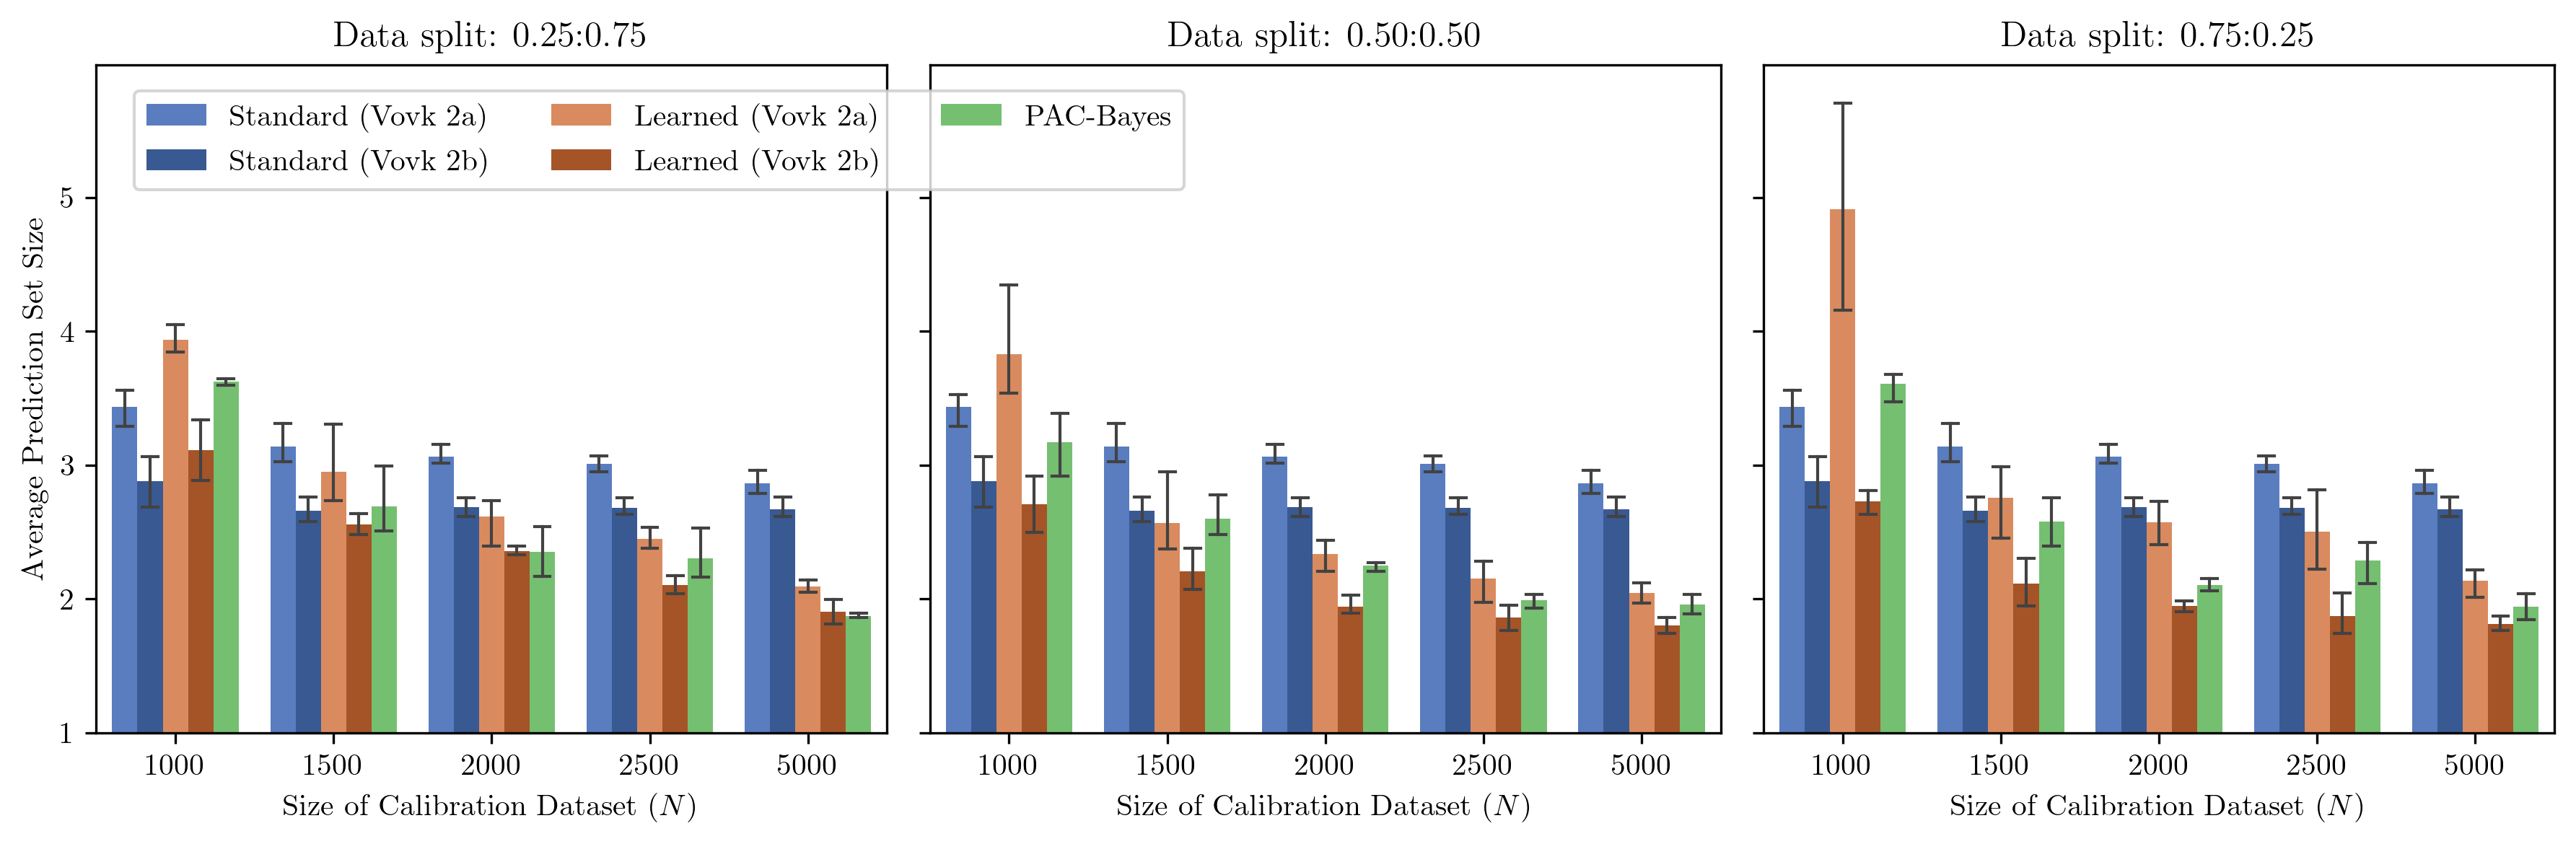

In [41]:
fig, axes = plt.subplots(1, 3, sharey="row", figsize=[12,4], dpi=300)
for i, ps in enumerate([0.25,0.5,0.75]):
    plot_efficiency_vs_n(axes[i], results, ps, ylabel=(i==0))
    axes[i].set_title(f"Data split: {ps:0.2f}:{1-ps:0.2f}")
    axes[i].legend().remove()
fig.legend(*axes[-1].get_legend_handles_labels(), loc="upper left", bbox_to_anchor=[0.05,0.9], ncols=3)
axes[0].set_ylim([1,axes[-1].get_ylim()[1]])
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_ROOT, "efficiency_vs_n.pdf"))

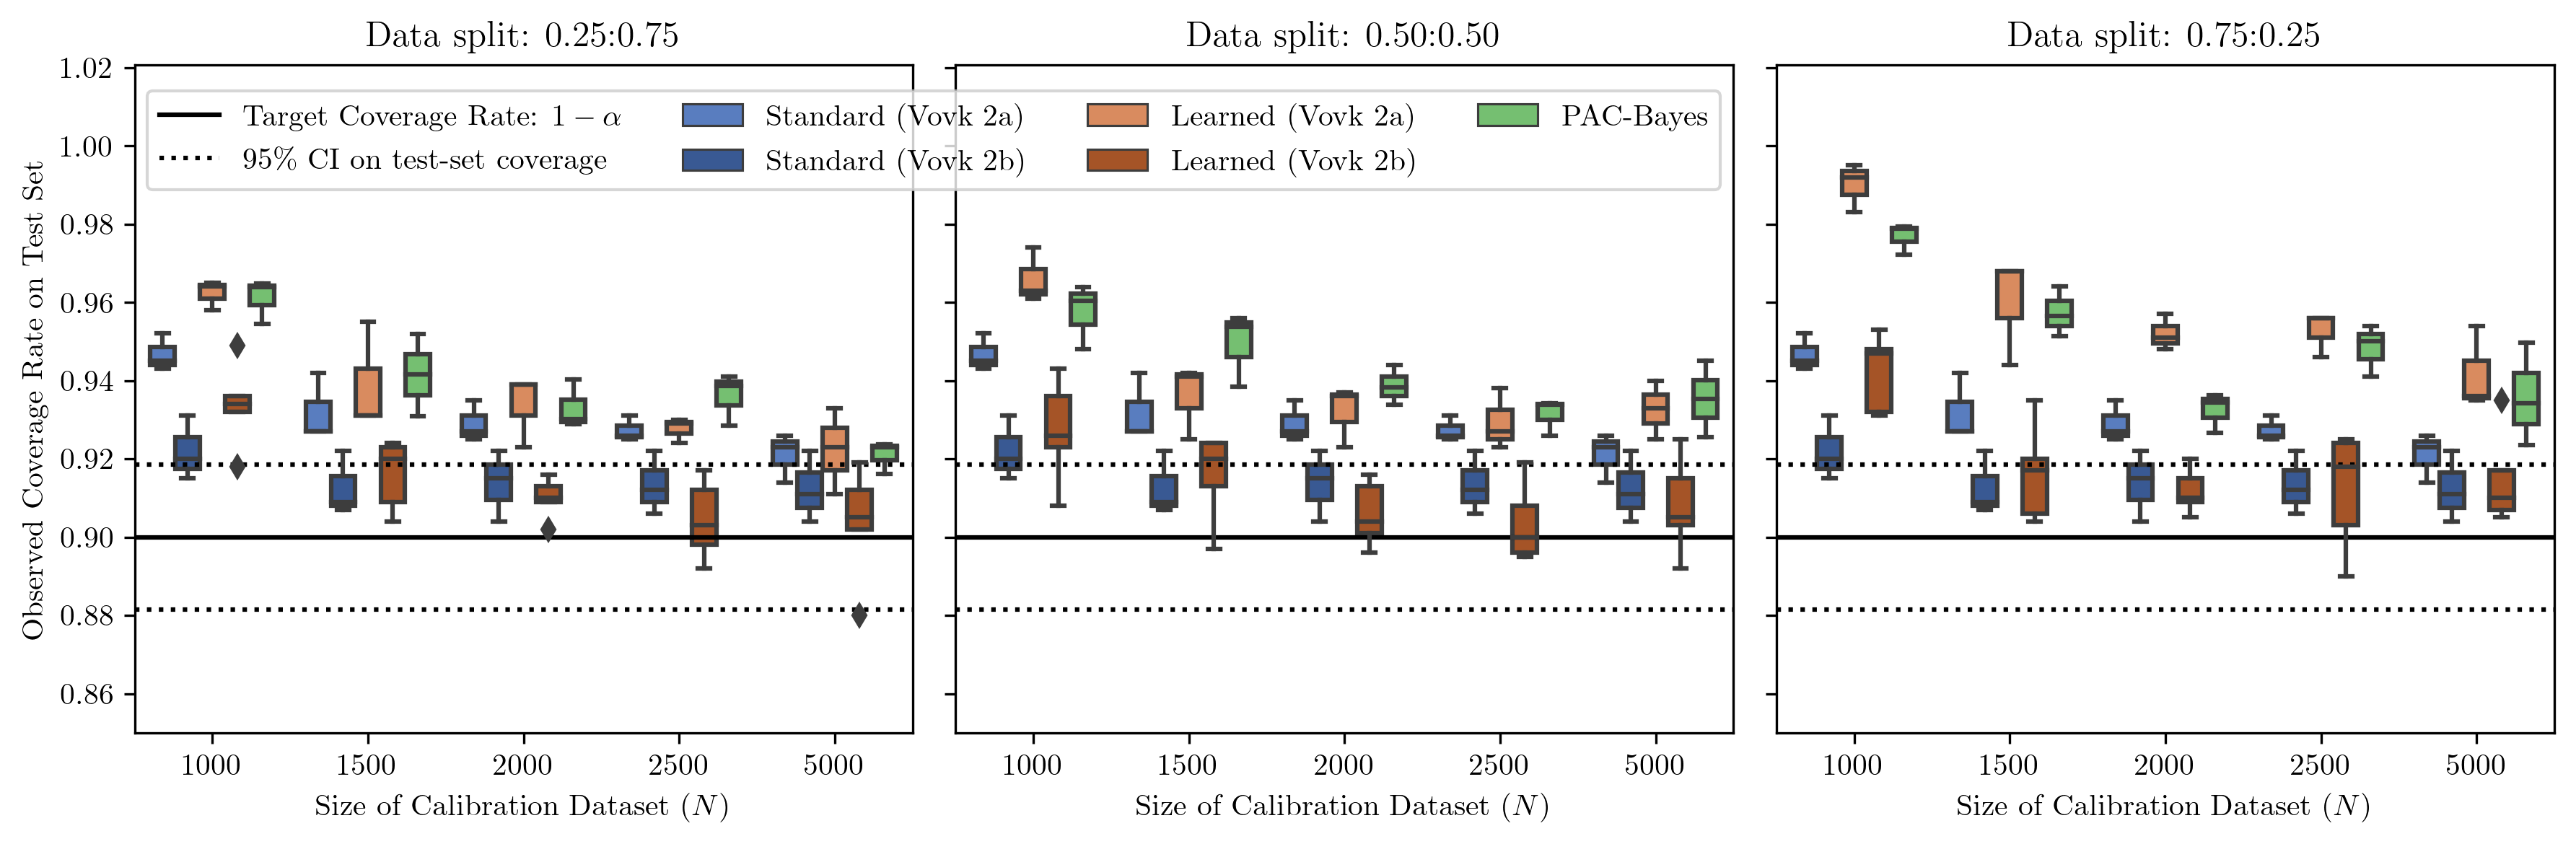

In [42]:
fig, axes = plt.subplots(1, 3, sharey="row", figsize=[12,4], dpi=300)
for i, ps in enumerate([0.25,0.5,0.75]):
    axes[i].axhline(0.9, label=r"Target Coverage Rate: $1-\alpha$", color='k')
    axes[i].axhline(0.9 + 1.96*np.sqrt((0.1*0.9)/1000), linestyle=':', color='k')
    axes[i].axhline(0.9 - 1.96*np.sqrt((0.1*0.9)/1000), linestyle=':', color='k', label="95\% CI on test-set coverage")
    plot_coverage_vs_n(axes[i], results, prior_split=ps, ylabel=(i==0) )
    axes[i].set_title(f"Data split: {ps:0.2f}:{1-ps:0.2f}")
    axes[i].legend().remove()
fig.legend(*axes[-1].get_legend_handles_labels(), loc="upper left", bbox_to_anchor=[0.055,0.9],  ncols=4)
axes[0].set_ylabel("Observed Coverage Rate on Test Set")
axes[0].set_ylim([0.85,axes[-1].get_ylim()[1]+0.02])
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_ROOT, "coverage_vs_n.pdf"))

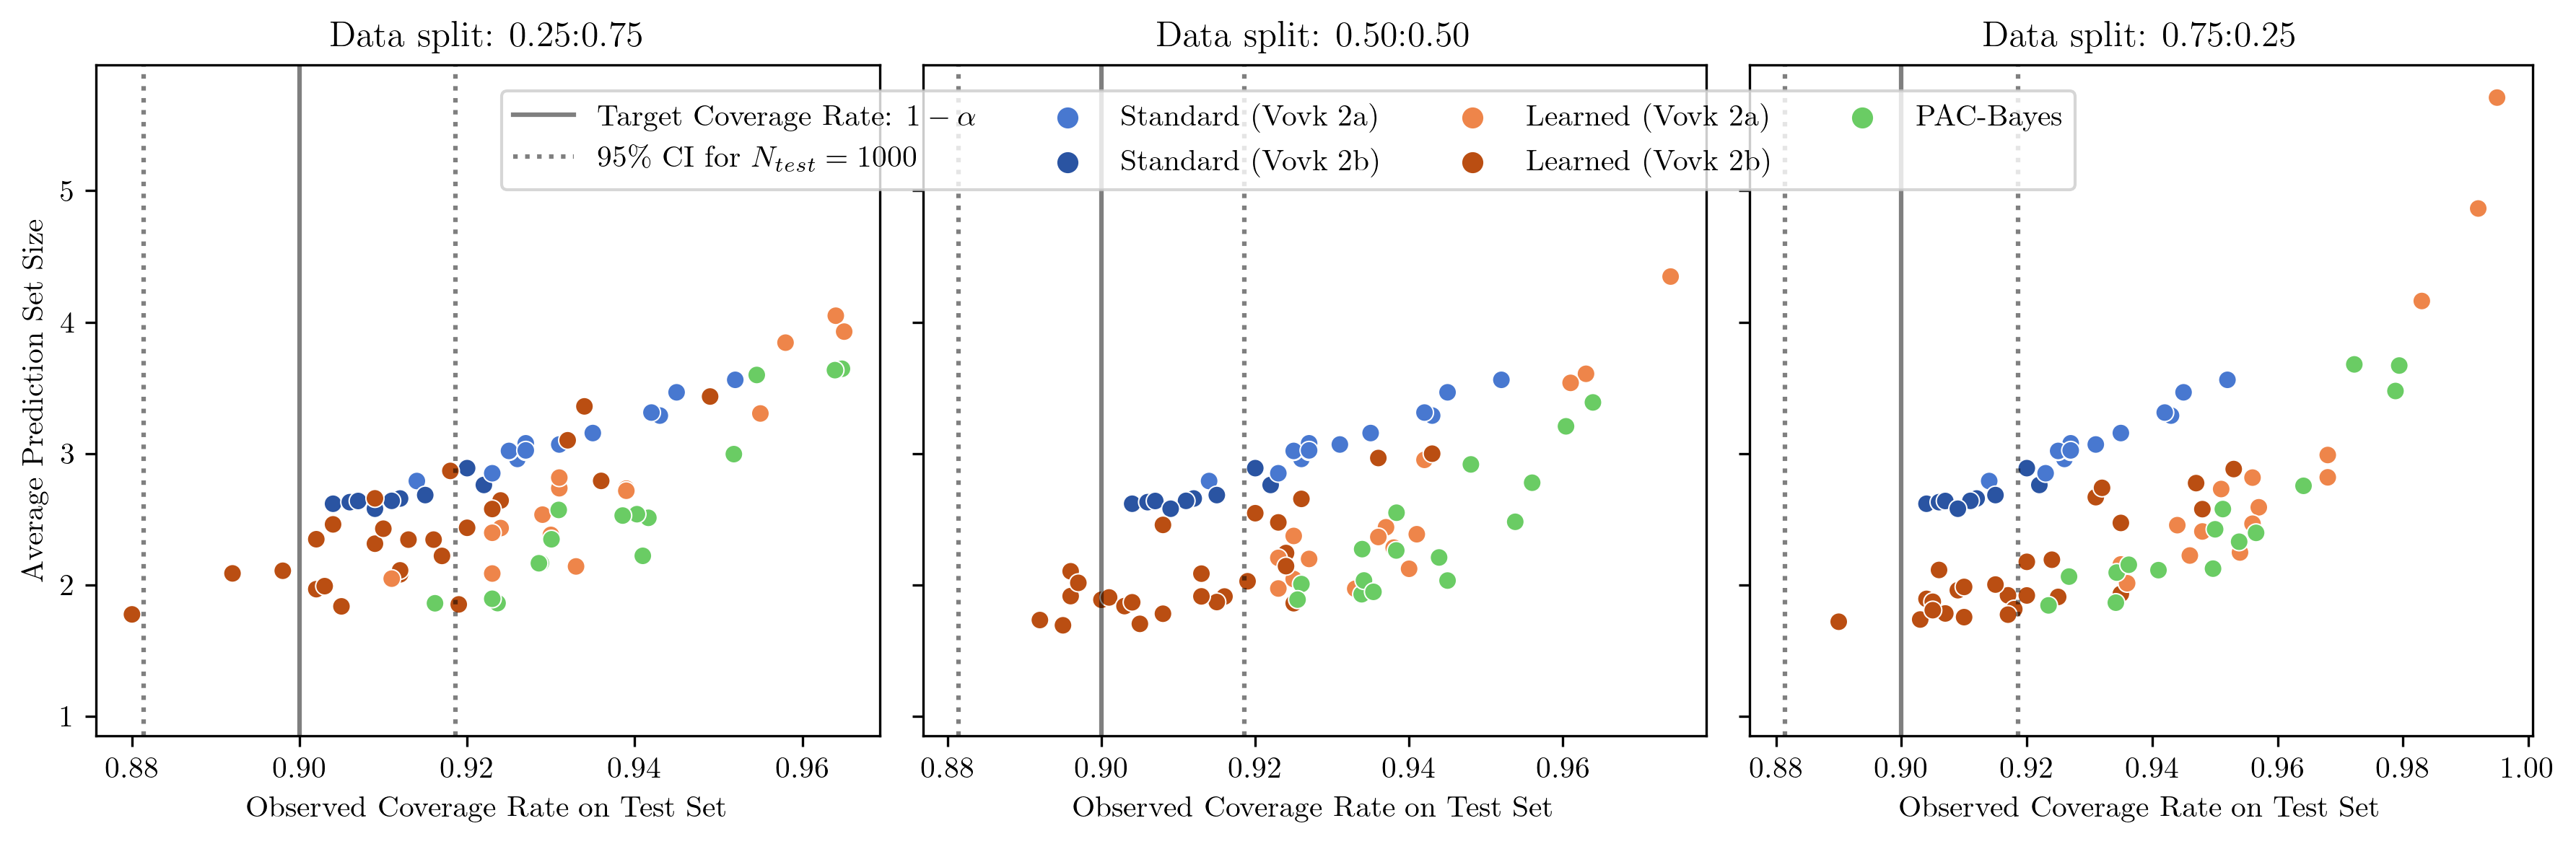

In [43]:
fig, axes = plt.subplots(1, 3, sharey="row", figsize=[12,4], dpi=300)
for i, ps in enumerate([0.25,0.5,0.75]):
    axes[i].axvline(0.9, label=r"Target Coverage Rate: $1-\alpha$", alpha=0.5, color='k')
    axes[i].axvline(0.9 + 1.96*np.sqrt((0.1*0.9)/1000), alpha=0.5, linestyle=':', color='k')
    axes[i].axvline(0.9 - 1.96*np.sqrt((0.1*0.9)/1000), alpha=0.5, linestyle=':', color='k', label="95\% CI for $N_{test}=1000$")
    plot_efficency_vs_coverage(axes[i], results, prior_split=ps, ylabel=(i==0) )
    axes[i].set_title(f"Data split: {ps:0.2f}:{1-ps:0.2f}")
    axes[i].legend().remove()
fig.legend(*axes[-1].get_legend_handles_labels(), loc="upper center", bbox_to_anchor=[0.5,0.9], ncols=4)
axes[0].set_ylabel("Average Prediction Set Size")
axes[0].set_ylim([0.85,axes[-1].get_ylim()[1]+0.05])
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_ROOT, "efficiency_vs_coverage.pdf"))

/home/apoorvas/code/pac-bayes-conformal-sets/experiments/mnist_utils.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_opt_df["calibrate.wrapper.prior_opt"] = "None"


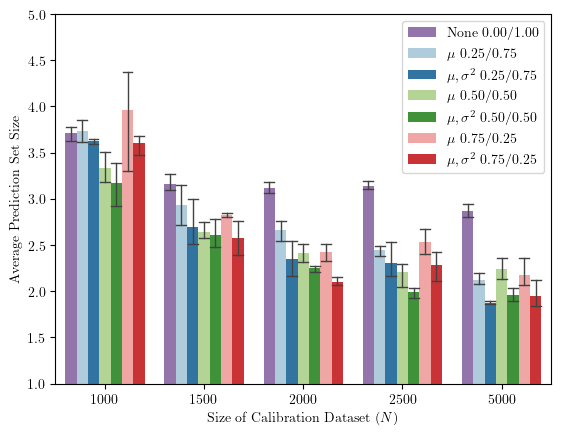

In [44]:
fig, axes = plt.subplots()
plot_efficiency_vs_prior_opts(axes, results)
plt.savefig(os.path.join(FIGURES_ROOT, "efficiency_vs_prior_opt.pdf"))